###Prediction of forest types using forest cover type dataset
Atharva Deshmukh

In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.datasets import fetch_covtype


In [2]:
covertype = fetch_covtype()


In [3]:
data = pd.DataFrame(data=covertype.data, columns=covertype.feature_names)
data['target'] = covertype.target
print(data.shape)
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = data[col].astype(int)

(581012, 55)


In [ ]:
print(data.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [ ]:
print(data.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

Distribution

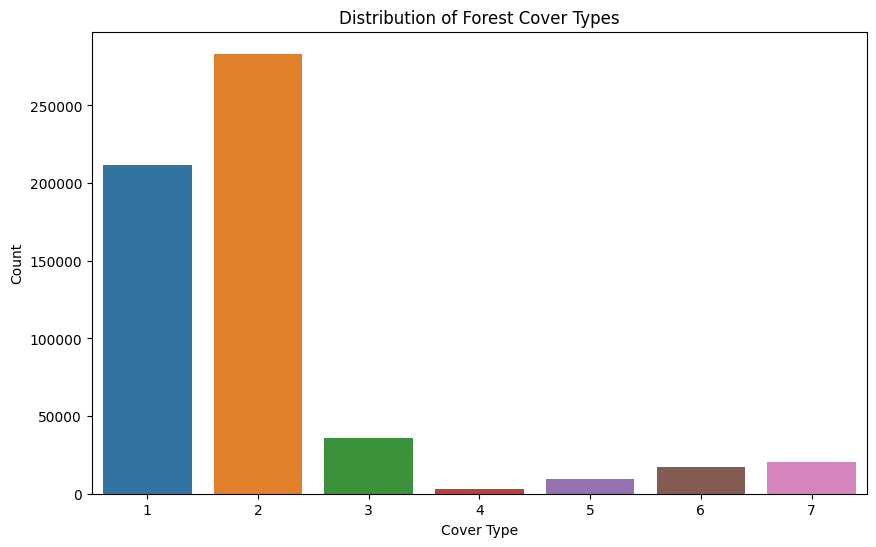

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

# Correlation heatmap


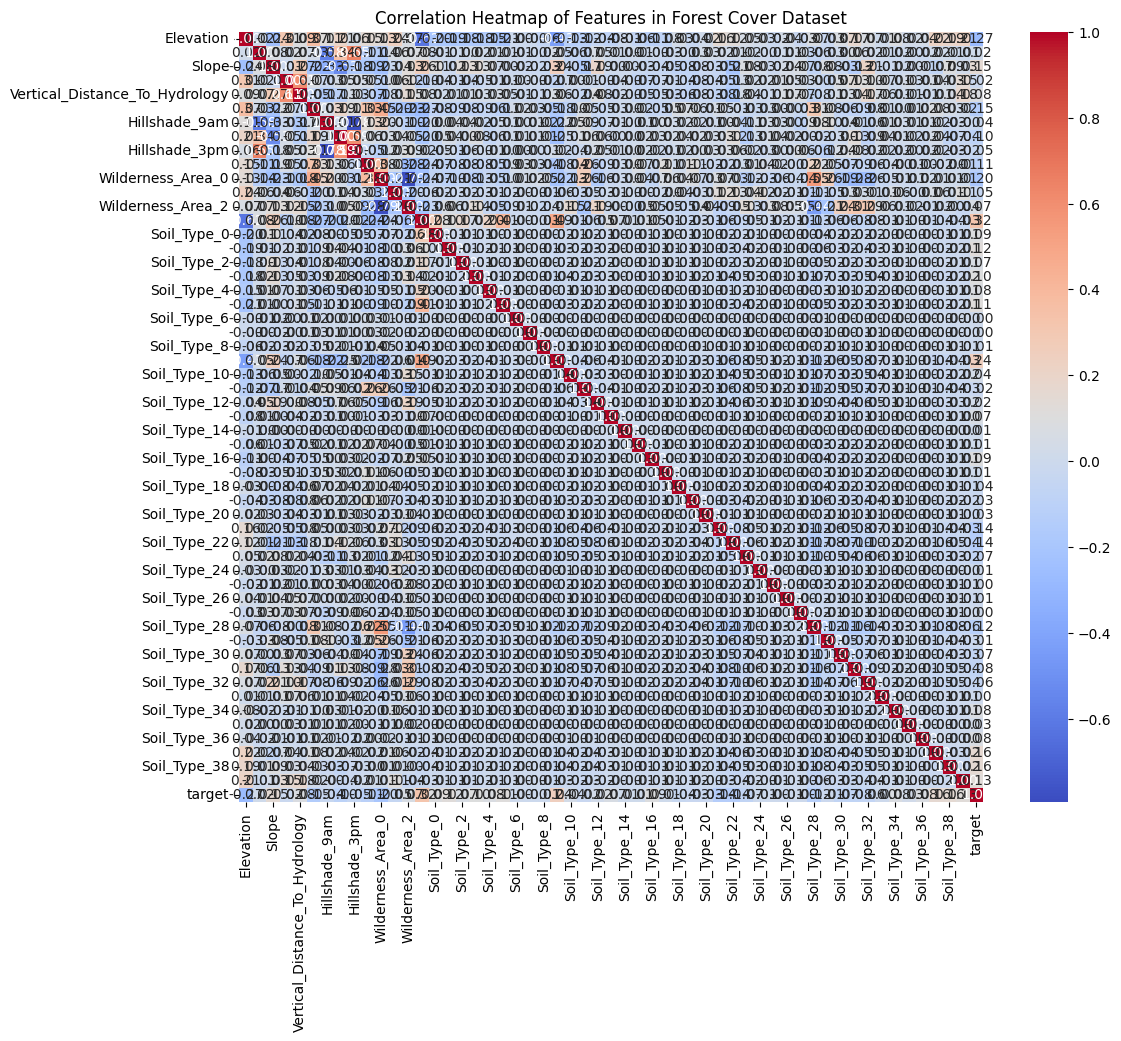

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Features in Forest Cover Dataset')
plt.show()


In [ ]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Histogram Plot of feature distribution

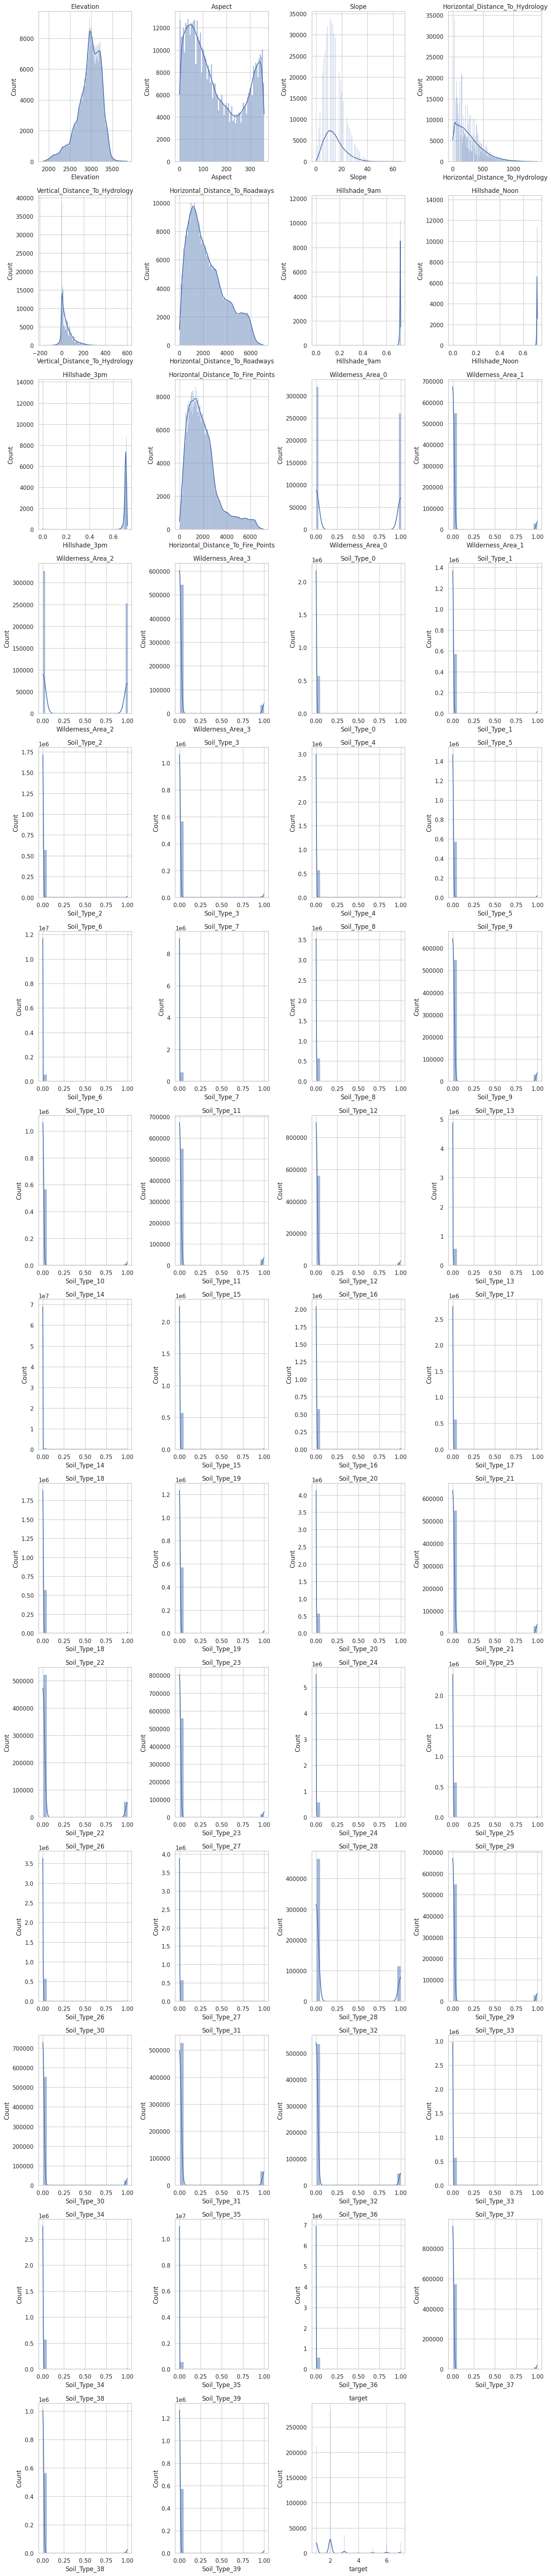

In [ ]:
num_features = len(data.columns)
num_cols = 4
num_rows = -(-num_features // num_cols)
plt.figure(figsize=(15, 5 * num_rows))

sns.set(style="whitegrid")

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [4]:
data['Elevation_Range'] = pd.cut(data['Elevation'], bins=[0, 2000, 4000, 6000], labels=[1, 2, 3])

data['Euclidean_Distance_To_Hydrology'] = np.sqrt(data['Horizontal_Distance_To_Hydrology']**2 + data['Vertical_Distance_To_Hydrology']**2)

data['Total_Distance'] = data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways'] + data['Horizontal_Distance_To_Fire_Points']

skewed_features = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
data[skewed_features] = np.log1p(data[skewed_features])


print(data.shape)


(581012, 58)


In [5]:
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE

X = data.drop('target', axis=1)
y = data['target']
scaler = StandardScaler()
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_bal,y_bal = smote.fit_resample(X,y)


In [6]:
columns_to_drop = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']
data = data.drop(columns=columns_to_drop)

In [7]:
data = pd.DataFrame(data=X_bal, columns=covertype.feature_names)
data['target'] = y_bal

In [ ]:
print(data.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


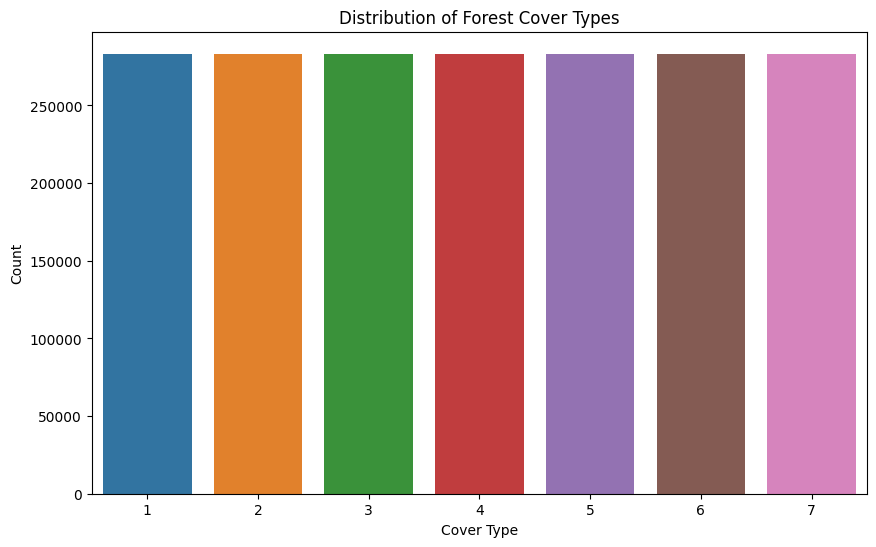

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

In [ ]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596,51,3,258,0,510,5.402677,5.451038,5.003946,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,5.398163,5.463832,5.023881,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,5.459586,5.476464,4.912655,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,5.476464,5.476464,4.812184,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,5.398163,5.459586,5.017280,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
X.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


**PCA**

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_standardized)

# Create a new DataFrame with the PCA components and target variable
data_pca = pd.DataFrame(data=X_pca, columns=['Principal_Component_1', 'Principal_Component_2','Principal_Component_3','Principal_Component_4','Principal_Component_5','Principal_Component_6','Principal_Component_7','Principal_Component_8','Principal_Component_9','Principal_Component_10'])
data_pca['target'] = y


In [ ]:
data_pca.head()

,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,target
0,-2.509452,2.451337,-2.291177,0.831781,-0.220532,-1.531029,0.034488,0.097323,-0.579926,-0.981191,5
1,-2.483078,2.387199,-2.498352,0.735183,-0.183471,-1.470711,0.047160,0.084316,-0.567026,-0.978182,5
2,-3.273672,2.167774,-1.833536,1.449218,-0.635602,-1.993203,1.596190,-2.096475,-2.910374,1.926223,2
3,-2.410416,2.797605,-0.307335,1.553326,0.253265,-0.428948,2.133659,-0.083834,0.038754,0.874251,2
4,-2.413280,2.455401,-2.534095,0.673772,-0.117929,-1.424174,0.035592,0.093176,-0.567497,-0.973581,5


In [9]:
X_p = data_pca.drop('target', axis=1)
y_p = data_pca['target']

Test train split

In [46]:
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_p, y_p, test_size=0.2, random_state=42)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
X_train_pca.head()

,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10
1282023,0.008187,2.968020,0.189209,1.098087,-0.296898,-0.695787,-0.020350,0.339907,-0.743296,0.922941
485369,-1.456400,-1.831533,-0.455639,-0.418560,1.992008,3.272879,-1.512256,0.320458,-1.039072,-0.233933
213915,-2.825884,1.179702,-1.586680,0.234661,-0.258240,1.460388,0.541392,0.676230,1.012531,0.411884
940013,3.089719,1.072745,-0.435874,-1.317577,1.110356,-0.221987,1.852987,-0.268220,-0.176545,0.628201
1032457,2.135704,0.820738,-0.895202,-0.429292,-0.090541,0.375118,-0.129257,-0.463857,-0.010379,-0.015778


In [47]:
print(X_train_pca.size)
print(X_test_pca.size)
print(X_val_pca.size)


15864850
1983110
1983110


##SGD

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
param_dist = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2'],
    'max_iter': [5, 10, 20, 50],
    'random_state': [42]
}

sgd_classifier = SGDClassifier()
sgd_random_search = RandomizedSearchCV(
    sgd_classifier, param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

sgd_random_search.fit(X_train_pca, y_train_pca)
best_sgd_params = sgd_random_search.best_params_
print(f"Best hyperparameters for SGDClassifier: {best_sgd_params}")
sgd_classifier_best = SGDClassifier(**best_sgd_params)
sgd_classifier_best.fit(X_train_pca, y_train_pca)
y_pred_sgd_best = sgd_classifier_best.predict(X_val_pca)
accuracy_sgd_best = accuracy_score(y_val_pca, y_pred_sgd_best)
print(f"SGDClassifier Accuracy on Validation Set with Best Hyperparameters: {accuracy_sgd_best:.2%}")
print("Classification Report:\n", classification_report(y_val_pca, y_pred_sgd_best))
print("Confusion Matrix:\n", confusion_matrix(y_val_pca, y_pred_sgd_best))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Best hyperparameters for SGDClassifier: {'random_state': 42, 'penalty': 'l1', 'max_iter': 5, 'loss': 'log'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier Accuracy on Validation Set with Best Hyperparameters: 56.65%
Accuracy: 0.5664871924492243
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.33      0.41    113290
           2       0.45      0.44      0.44    113332
           3       0.48      0.35      0.41    113469
           4       0.75      0.79      0.77    113134
           5       0.48      0.62      0.55    113430
           6       0.53      0.59      0.56    113263
           7       0.69      0.84      0.76    113325

    accuracy                           0.57    793243
   macro avg       0.56      0.57      0.56    793243
weighted avg       0.56      0.57      0.56    793243

Confusion Matrix:
 [[37349 30220   373   165 11998  1256 31929]
 [16658 49455  3561  1063 25551  6886 10158]
 [    0  1102 39586 17828 19050 35897     6]
 [    0     0 14754 89573     0  8807     0]
 [ 8223 20405  6597   369 70885  5874  1077]
 [  700  1419 16472 10811 16775

In [ ]:
import warnings
warnings.filterwarnings("ignore")


## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],

}



rf_random_search = RandomizedSearchCV(
    rf_classifier, param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

rf_random_search.fit(X_train_pca, y_train_pca)

best_params = rf_random_search.best_params_

print(f"Best hyperparameters for Random Forest: {best_params}")

y_pred_val_rcf = rf_random_search.predict(X_val_pca)

print("Accuracy:", accuracy_score(y_val_pca, y_pred_val_rcf))
print("Classification Report:\n", classification_report(y_val_pca, y_pred_val_rcf))
print("Confusion Matrix:\n", confusion_matrix(y_val_pca, y_pred_val_rcf))

Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}
Accuracy: 0.9560689473465256
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.90      0.91    113290
           2       0.91      0.88      0.90    113332
           3       0.97      0.95      0.96    113469
           4       0.98      1.00      0.99    113134
           5       0.97      1.00      0.98    113430
           6       0.95      0.97      0.96    113263
           7       0.98      1.00      0.99    113325

    accuracy                           0.96    793243
   macro avg       0.96      0.96      0.96    793243
weighted avg       0.96      0.96      0.96    793243

Confusion Matrix:
 [[101513   9053     75      0    629    188   1832]
 [  8270 100063   1292     22   2062   1429    194]
 [     2    186 107926   1455    239   3661      0]
 [     0      0    109 11294

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dct = DecisionTreeClassifier()
dt_classifier = DecisionTreeClassifier()
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
            }

# Hyperparameter tuning using Grid Search
dt_grid_search = RandomizedSearchCV(dt_classifier, dt_params, cv=3, scoring='accuracy')
dt_grid_search.fit(X_train_pca, y_train_pca)

# Best hyperparameters
dt_best_params = dt_grid_search.best_params_
print(f"\nBest hyperparameters for Decision Tree: {dt_best_params}")

dt_best_model = dt_grid_search.best_estimator_
y_pred_val_dt = dt_best_model.predict(X_val_pca)
accuracy_dt = accuracy_score(y_val_pca, y_pred_val_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")


Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
Decision Tree Accuracy: 92.03%


In [12]:
print("Accuracy:", accuracy_score(y_val_pca, y_pred_val_dt))
print("Classification Report:\n", classification_report(y_val_pca, y_pred_val_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val_pca, y_pred_val_dt))


Accuracy: 0.9203131953260224
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.84      0.84    113290
           2       0.84      0.81      0.82    113332
           3       0.93      0.91      0.92    113469
           4       0.97      0.98      0.98    113134
           5       0.96      0.98      0.97    113430
           6       0.92      0.93      0.93    113263
           7       0.98      0.98      0.98    113325

    accuracy                           0.92    793243
   macro avg       0.92      0.92      0.92    793243
weighted avg       0.92      0.92      0.92    793243

Confusion Matrix:
 [[ 95148  14430    153      0    894    256   2409]
 [ 14876  92261   1452     41   2854   1505    343]
 [    79   1018 103681   1769    524   6388     10]
 [     0     24   1088 111241      0    781      0]
 [   462   1385    357      0 110901    273     52]
 [   194    938   5294   1076    371 105382      8]
 [  1561    304    

## Decision Tree without PCA

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dct1 = DecisionTreeClassifier()
dt_classifier1 = DecisionTreeClassifier()
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
            }

# Hyperparameter tuning using Grid Search
dt_grid_search1 = RandomizedSearchCV(dt_classifier1, dt_params, cv=3, scoring='accuracy')
dt_grid_search1.fit(X_train, y_train)

# Best hyperparameters
dt_best_params1 = dt_grid_search1.best_params_
print(f"\nBest hyperparameters for Decision Tree: {dt_best_params1}")

dt_best_model_1 = dt_grid_search1.best_estimator_



Best hyperparameters for Decision Tree: {'min_samples_split': 2, 'max_depth': 30, 'criterion': 'entropy'}


In [21]:
y_pred_val_dt_1 = dt_best_model_1.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_val_dt_1)
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")
print("Accuracy:", accuracy_score(y_val, y_pred_val_dt_1))
print("Classification Report:\n", classification_report(y_val, y_pred_val_dt_1))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_dt_1))

Decision Tree Accuracy: 98.06%
Accuracy: 0.9806213472777607
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.95      0.95     28491
           2       0.95      0.94      0.94     28239
           3       0.99      0.99      0.99     28359
           4       1.00      1.00      1.00     28076
           5       0.99      1.00      0.99     28397
           6       0.99      0.99      0.99     28347
           7       1.00      1.00      1.00     28402

    accuracy                           0.98    198311
   macro avg       0.98      0.98      0.98    198311
weighted avg       0.98      0.98      0.98    198311

Confusion Matrix:
 [[27147  1187     0     0    34     5   118]
 [ 1412 26493    97     0   144    79    14]
 [    3    64 28070    41    11   170     0]
 [    0     0    18 28045     0    13     0]
 [   19    54    19     0 28301     4     0]
 [    3    48   160    29     4 28103     0]
 [   79    14     0     0     

## Boosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(base_estimator=dt_best_model_1, n_estimators=50, learning_rate=1.0)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_val)
accuracy_ada = accuracy_score(y_val, y_pred_ada)
print("Classification Report:\n", classification_report(y_val, y_pred_ada))
print(f"AdaBoost Accuracy on Validation Set: {accuracy_ada:.2%}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97     28491
           2       0.97      0.96      0.96     28239
           3       1.00      1.00      1.00     28359
           4       1.00      1.00      1.00     28076
           5       0.99      1.00      1.00     28397
           6       1.00      1.00      1.00     28347
           7       1.00      1.00      1.00     28402

    accuracy                           0.99    198311
   macro avg       0.99      0.99      0.99    198311
weighted avg       0.99      0.99      0.99    198311

AdaBoost Accuracy on Validation Set: 98.85%

Randomized Search Results:


## Test Data

In [40]:
y_pred_test = ada_classifier.predict(X_test)
accuracy_ada_test = accuracy_score(y_test, y_pred_test)
print(f"AdaBoost Accuracy on Validation Set: {accuracy_ada_test:.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred_test))

conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix_ada)

AdaBoost Accuracy on Validation Set: 98.86%
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97     28394
           2       0.97      0.96      0.96     28156
           3       1.00      1.00      1.00     28325
           4       1.00      1.00      1.00     28482
           5       1.00      1.00      1.00     28598
           6       1.00      1.00      1.00     28260
           7       1.00      1.00      1.00     28096

    accuracy                           0.99    198311
   macro avg       0.99      0.99      0.99    198311
weighted avg       0.99      0.99      0.99    198311

Confusion Matrix:
 [[27458   849     1     0    17     5    64]
 [  896 27044    65     0    99    41    11]
 [    0    13 28208    33     5    66     0]
 [    0     0     8 28473     0     1     0]
 [    1    15     3     0 28578     1     0]
 [    0     5    32    18     1 28204     0]
 [    5     1     0     0     0     0 28090]]
